In [57]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [58]:
img1=cv2.imread("input/kopek.png")
img2=cv2.imread("input/uyari.jpg")

In [59]:
# fotoğrafları rgb formatına getirdik
img1_rgb=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2_rgb=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [60]:
print(img1_rgb.shape)
print(img2_rgb.shape)

(544, 958, 3)
(1372, 2020, 3)


In [61]:
#şimdi iki fotoğrafın boyutlarını eşitleyeceğzi
img1_rgb=cv2.resize(img1_rgb,(1200,1200))
img2_rgb=cv2.resize(img2_rgb,(1200,1200))

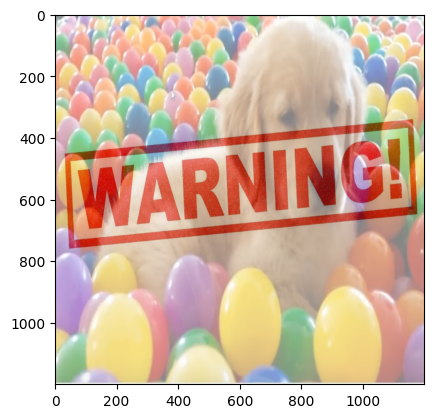

In [62]:
blende=cv2.addWeighted(img1_rgb,0.5,img2_rgb,0.5,0) # gama parametresi tüm piksel değerlerine eklenecek olan parametredir ( 5. parametre ) buna 0 verdik
plt.imshow(blende)

## iki farklı boyuttaki fotoğrafı birbirine yapıştıracağız


In [63]:
img1_rgb=cv2.resize(img1_rgb,(1300,700))
img2_rgb=cv2.resize(img2_rgb,(600,600))

In [64]:
# yeniden isimlerndirelim
large_image=img1_rgb
small_image=img2_rgb

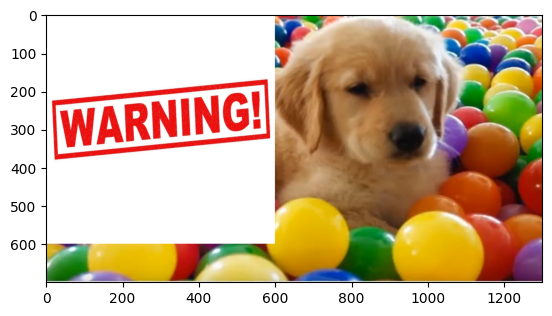

In [65]:
# şimdi yapıştıralım
large_image[0:600,0:600]=small_image # dedik ki large_image imin x ve y de 0 dan 600 e kadar olan kısımları small_image olsun
plt.imshow(large_image)

## Blend ( karışım ) işlemi

In [66]:
img1_rgb=cv2.resize(img1_rgb,(1280,720))
img1_rgb.shape

(720, 1280, 3)

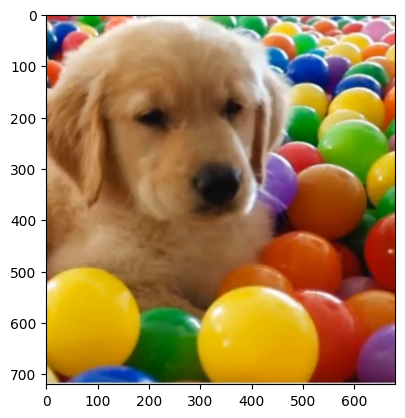

In [67]:
roi=img1_rgb[0:720,600:1280] # önce y ekseni sonraki x ekseni
plt.imshow(roi)

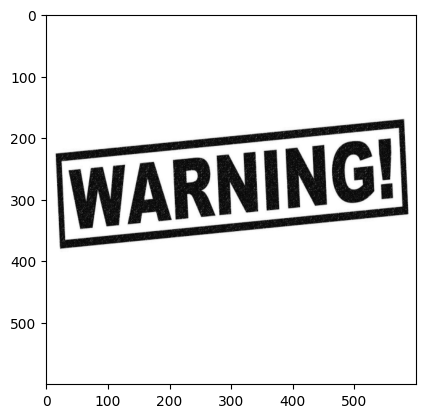

In [68]:
# 2. fotoğrafını gri formata dönüştürüyorum
img2_gray=cv2.cvtColor(img2_rgb,cv2.COLOR_RGB2GRAY)
plt.imshow(img2_gray,cmap='gray') # Hatırlatma : plt.imshow farklı formatta  olduğundan gray çevirince camp vermemiz gerekiyor

(600, 600)


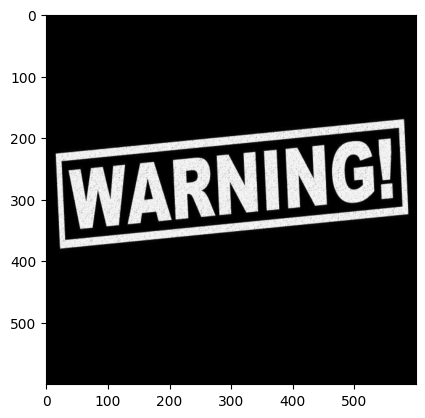

In [69]:
 # şimdi arka planı siyeh, yazımızı ise beyaz yapacağız.
mask_invert=cv2.bitwise_not(img2_gray)
plt.imshow(mask_invert,cmap='gray') 
print(mask_invert.shape) # gördüğümüz gibi renk kanalı için bir şey yazmadı çünkü siyah beyaz yaptık

### cv2.bitwise_not OpenCV kütüphanesinin bir fonksiyonudur ve görüntü işleme alanında kullanılır. Bu fonksiyon, bir görüntünün piksel değerlerini tersine çevirmek için kullanılır. <br>Yani, beyaz pikseller siyah yapılır ve siyah pikseller beyaz yapılır.<br>
cv2.bitwise_not(src, dst=None, mask=None)
<br>
* src: İşlenecek giriş görüntüsü.
* dst: İşlenmiş görüntünün çıkışı. Bu parametre belirtilmezse, işlenmiş görüntü src üzerine yazılır.
* mask: Opsiyonel olarak belirtilen bir maske. Bu maske, yalnızca belirli bölgelerin tersine çevrilmesini sağlar.

In [70]:
white_background=np.full((600,600,3),255,dtype=np.uint8) # 3 de 3 renk kanalı olsun manasında

Bu kod, 600x600 boyutlarında beyaz bir arka plan oluşturan bir NumPy dizisi (white_background) oluşturur. İşte bu kodun ayrıntıları:<br>
Bu kod, np.full fonksiyonunu kullanarak belirtilen boyutlarda ve belirli bir değerde (255, yani beyaz) dolu bir NumPy dizisi oluşturur. dtype=np.uint8 parametresi, dizinin veri tipini 8 bitlik işaretsiz tamsayı olarak belirtir. Bu genellikle siyah-beyaz görüntülerde kullanılır, çünkü bir pikselin değeri 0 ile 255 arasında olabilir. 0 siyahı, 255 beyazı temsil eder.

Bu beyaz arka plan dizisini daha sonra başka görüntülerle birleştirebilir veya üzerine çizimler yapabilirsiniz. 

In [71]:
white_background.shape

(600, 600, 3)

(600, 600, 3)


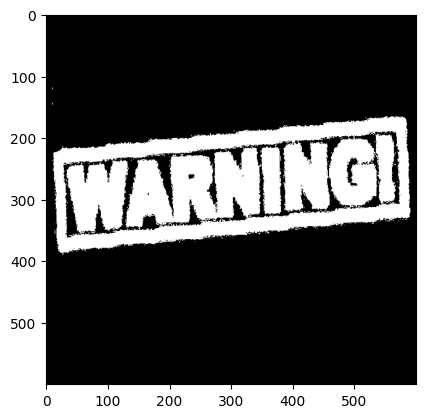

In [72]:
# şimdi 2 kanallının üstüne basarak 3 kanallı halini elde etmiş olacağız 
bk=cv2.bitwise_or(white_background,white_background,mask=mask_invert)
# 3 renk kanalında oluşan arka planı siyah olan fotoğraf elde etmiş oldum
print(bk.shape)
plt.imshow(bk)

bu kod cv2.bitwise_or fonksiyonunu kullanarak iki görüntüyü birleştiriyor. mask_invert adlı bir maskeyi kullanarak, belirli bir bölgedeki piksellerin birleştirme işlemine dahil edilip edilmeyeceğini kontrol edebilirsiniz.<br>
cv2.bitwise_or(src1, src2, dst=None, mask=None)
<br>
* src1: İlk giriş görüntüsü.
* src2: İkinci giriş görüntüsü.
* dst: İşlenmiş görüntünün çıkışı. Bu parametre belirtilmezse, işlenmiş görüntü src1 üzerine yazılır.
* mask: Opsiyonel olarak belirtilen bir maske. Bu maske, yalnızca belirli bölgelerin birleştirilmesini sağlar.

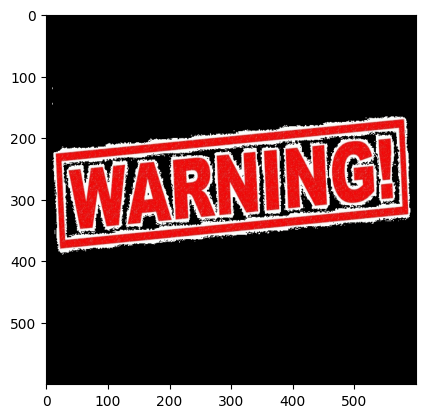

In [73]:
# şimdi yazımı kırmızıya çevireceğim
fg=cv2.bitwise_or(img2_rgb,img2_rgb,mask=mask_invert) # img2_rgb fotoğrafına maskı ekleyerek kırmızıyı sbt bırakıp arka planı siyah yapmış olduk şeklinde yorumladım
plt.imshow(fg)

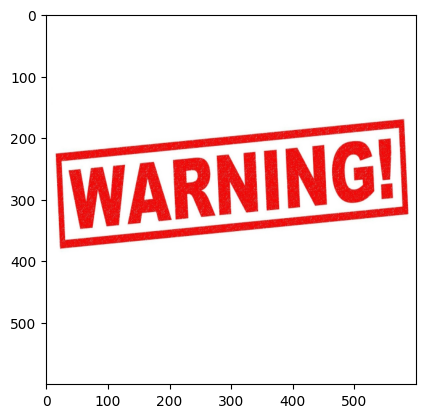

In [74]:
plt.imshow(img2_rgb)


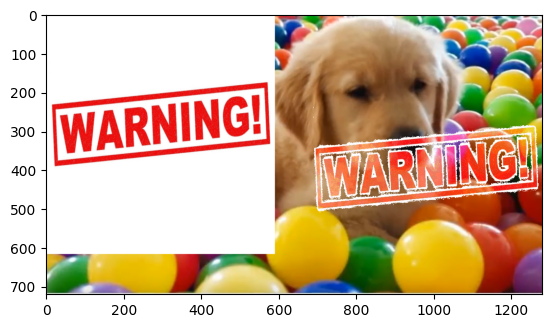

In [81]:
# şimdi fg fotoğrafımı roi me yapıştıracağım
# bunların shape leri aynı olmalı
roi=img1_rgb[120:720,680:1280]
final_roi=cv2.bitwise_or(roi,fg)
plt.imshow(final_roi)
plt.imshow(large_image)

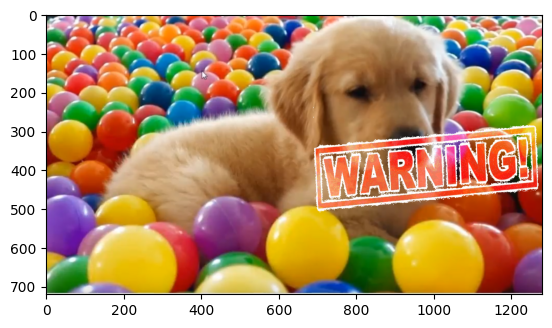

In [82]:
# şimdi de büyük fotoğrafın sağ tarafına yapıştıracağız
# karışıklık olduğundan bu kısmı tekrardan tanımladım
img1=cv2.imread("input/kopek.png")
img1_rgb=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img1_rgb=cv2.resize(img1_rgb,(1280,720))

large_image=img1_rgb
small_image=final_roi
large_image[120:720,680:1280]=small_image
plt.imshow(large_image)